#### Imports

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mlp
import seaborn as sns

import scipy

In [2]:
%matplotlib inline

#### Initializing variables

In [3]:
# Geometry on X
Lx = 1
Nx = 100
dx = Lx/(Nx - 1)
epsx = 1/dx

# Geometry on Y
Ly = 1
Ny = 100
dy = Ly/(Ny - 1)
epsy = 1/dy

# Mesh
Xv = np.linspace(0, Lx, Nx)
Yv = np.linspace(0, Ly, Ny)
X, Y = np.meshgrid(Xv, Yv)
Npoints = Nx*Ny

# Time
dt = 0.001
Nt = 10_000

# Material
alpha = 0.02
k = 1

# Heat Source
Q = 0

# Boundary Conditions
T_left = 0
T_top = 30
T_right = 100
T_bottom = 50

coef = alpha*dt/(dx**2)

#### Setup and calculation

In [4]:
A = np.eye(Npoints)
b = np.zeros((Npoints,1))    

for i in range(Npoints):
    idx_x = i % Nx 
    idx_y = i // Nx

    if idx_x == 0:
        b[i] = T_left
    elif idx_x == Nx - 1:
        b[i] = T_right
    elif idx_y == 0:
        b[i] = T_bottom
    elif idx_y == Ny - 1:
        b[i] = T_top
    else:
        A[i, i] = -2*epsx**2 - 2*epsy**2
        A[i, idx_x - 1 + Nx*(idx_y)] = epsx**2
        A[i, idx_x + 1 + Nx*(idx_y)] = epsx**2
        A[i, idx_x + Nx*(idx_y - 1)] = epsy**2
        A[i, idx_x + Nx*(idx_y + 1)] = epsy**2


In [5]:
T_vector = np.linalg.solve(A,b)
T = np.reshape(T_vector, (Nx, Ny))

In [14]:
T_vector_sp = scipy.linalg.solve(A, b)
T_sp = scipy.reshape(T_vector_sp, (Nx, Ny))

/var/folders/9s/s51xglf11m5917w7kj4w6rpm0000gn/T/ipykernel_1052/1972519452.py:2: DeprecationWarning: scipy.reshape is deprecated and will be removed in SciPy 2.0.0, use numpy.reshape instead
  T_sp = scipy.reshape(T_vector_sp, (Nx, Ny))


<Axes: >

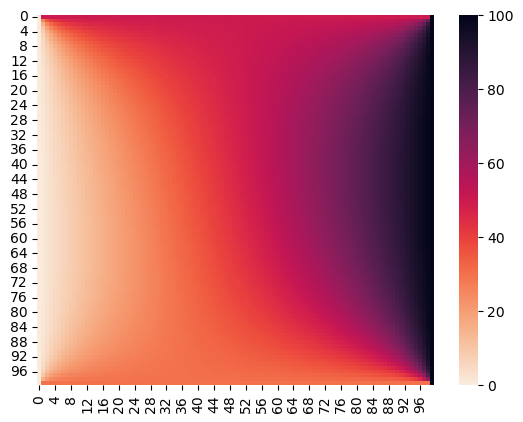

In [15]:
sns.heatmap(T_sp, cmap = "rocket_r")

<Axes: >

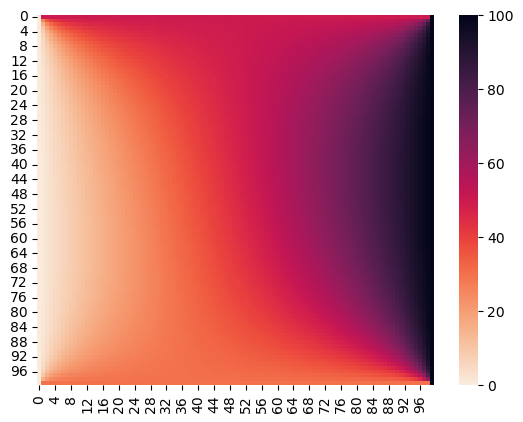

In [6]:
sns.heatmap(T, cmap = "rocket_r")

In [7]:
def heatFlux(T,i,j):
    Nx = len(T)
    Ny = len(T[0])

    if i == 0:
        qx = -k*(T[i + 1, j] - T[i, j])*epsx
    elif i == Nx - 1:
        qx = -k*(T[i, j] - T[i - 1, j])*epsx
    else:
        qx = -k*(T[i + 1, j] - T[i - 1, j])*epsx/2

    if j == 0:
        qy = -k*(T[i, j + 1] - T[i, j])*epsy
    elif j == Ny - 1:
        qy = -k*(T[i, j] - T[i, j - 1])*epsy
    else:
        qy = -k*(T[i, j + 1] - T[i, j - 1])*epsy/2

    return qx, qy

In [8]:
totalFlux = []
for i in range(Nx):
    for j in range(Ny):
        totalFlux.append(heatFlux(T, i, j))

totalFlux = np.array(totalFlux)

In [9]:
totalFlux_x = np.reshape(totalFlux[:, 0], (Nx, Ny))
totalFlux_y = np.reshape(totalFlux[:, 1], (Nx, Ny))

min_x = np.percentile(totalFlux_x, 5)
max_x = np.percentile(totalFlux_x, 95) 
min_y = np.percentile(totalFlux_y, 5)
max_y = np.percentile(totalFlux_y, 95)

<Axes: >

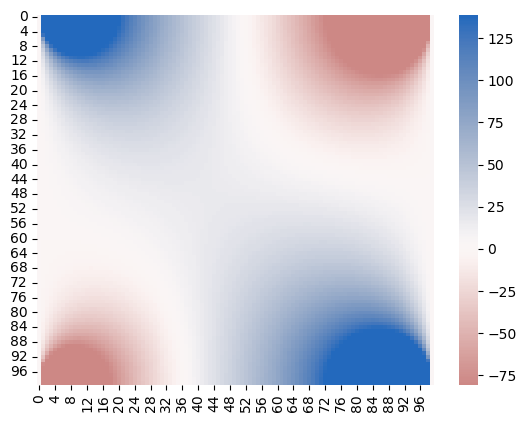

In [17]:
sns.heatmap(totalFlux_x, cmap = 'vlag_r', vmin = min_x, vmax = max_x, center = 0)

<Axes: >

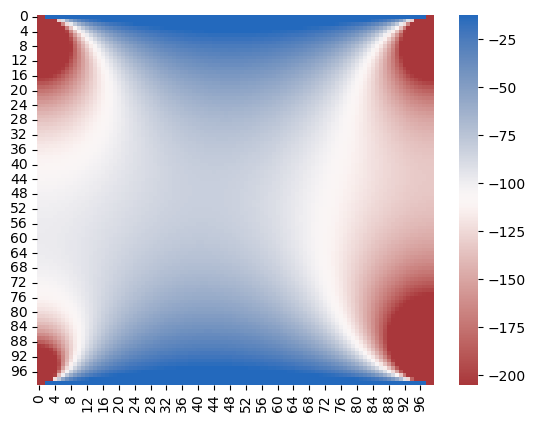

In [21]:
sns.heatmap(totalFlux_y, cmap = 'vlag_r', vmin = min_y, vmax = max_y)